# Graph Mining

## 📚 Exercise 1
Complete the function `compute_modularity` to compute the modularity measure of a given graph.

### Goal:
1. Visualizing two graphs using `networkx` (the Karate Club graph is currently commented out in the code)
2. Completing `compute_modularity` function that aims to measure modularity of a given graph

### What you are learning in this exercise:
1. Getting familiar with `networkx` library.
2. Analyzing modularity measure for different graph inputs

#### Hint: you can install `networkx` package by running the following command in a  notebook cell: `!conda install networkx --yes `

In [2]:
!conda install networkx --yes


Solving environment: ...working... done

## Package Plan ##

  environment location: D:\logiciel\miniconda

  added / updated specs:
    - networkx


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.10.11 |       haa95532_0         125 KB
    openssl-1.1.1s             |       h2bbff1b_0         5.5 MB
    ------------------------------------------------------------
                                           Total:         5.6 MB

The following packages will be UPDATED:

  ca-certificates                     2022.07.19-haa95532_0 --> 2022.10.11-haa95532_0 None
  openssl                                 1.1.1q-h2bbff1b_0 --> 1.1.1s-h2bbff1b_0 None




openssl-1.1.1s       | 5.5 MB    |            |   0% 
openssl-1.1.1s       | 5.5 MB    | 2          |   3% 
openssl-1.1.1s       | 5.5 MB    | #3         |  14% 
openssl-1.1.1s       | 5.5 MB    | ##6        |  26% 
openss

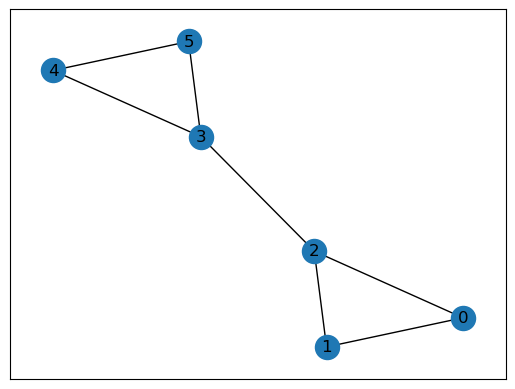

In [3]:
import networkx as nx
import numpy as np
%matplotlib inline

M = ["0,1,2",
"1,0,2",
"2,0,1,3",
"3,2,4,5",
"4,3,5",
"5,3,4"
    ]
G=nx.parse_adjlist(M, nodetype=int, delimiter=",")
nx.draw_networkx(G)

#G = nx.karate_club_graph()
#nx.draw_networkx(G)

In [4]:
for node in [0,1,2]:
    G.nodes[node]['community'] = 0
for node in [3,4,5]:
    G.nodes[node]['community'] = 1

In [5]:
# The community label of a node can be accessed by G[node_id]['community'] <==wrong see sol
# The degree of a node: G.degree[node_id]
# The neighbors of a node: G.neighbors(node_id)
# Number of edges between 2 nodes: G.number_of_edges(node_1, node_2)
def compute_modularity(G):
    m = len(G.edges)
    Q = 0
    # your code here
    for node in G.nodes:
        for neighbor in G.neighbors(node): #take in all nodes
            if G[node]['community']==G[neighbor]['community']:
                A=G.number_of_edges(node,neighbor)
                k1=G.degree[node]
                k2=G.degree[neighbor]
                Q=Q+(A-k1*k2/(2*m))
    return Q/(2*m)

In [6]:
compute_modularity(G)

KeyError: 'community'

## 📚 Exercise 2
Suppose that you have an undirected social graph G = (U, V), where U - set of nodes, V - set of edges.

<img src="graph.png" width="400">

Compute betweenness for the graph G and output the communities for the following betweenness threshold : 4, 6.

number of shortest path going througt: #only count once v1-v2 and v2-v1
betweenness at step 0:
AB:5
AC:1
CB:5
BD:3*4=12
DE:4+1/2=4.5
DG:4+1/2=4.5
DF:4
EF:1+1/2=1.5
GF:1+1/2=1.5
attention shortest path g to e : 2 possibilities : gfe or gde

threshold : remove all adge with a betweenness superior or = to the threshold

